Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
Systolic                     0
Diastolic                    0
dtype: int64
----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level     

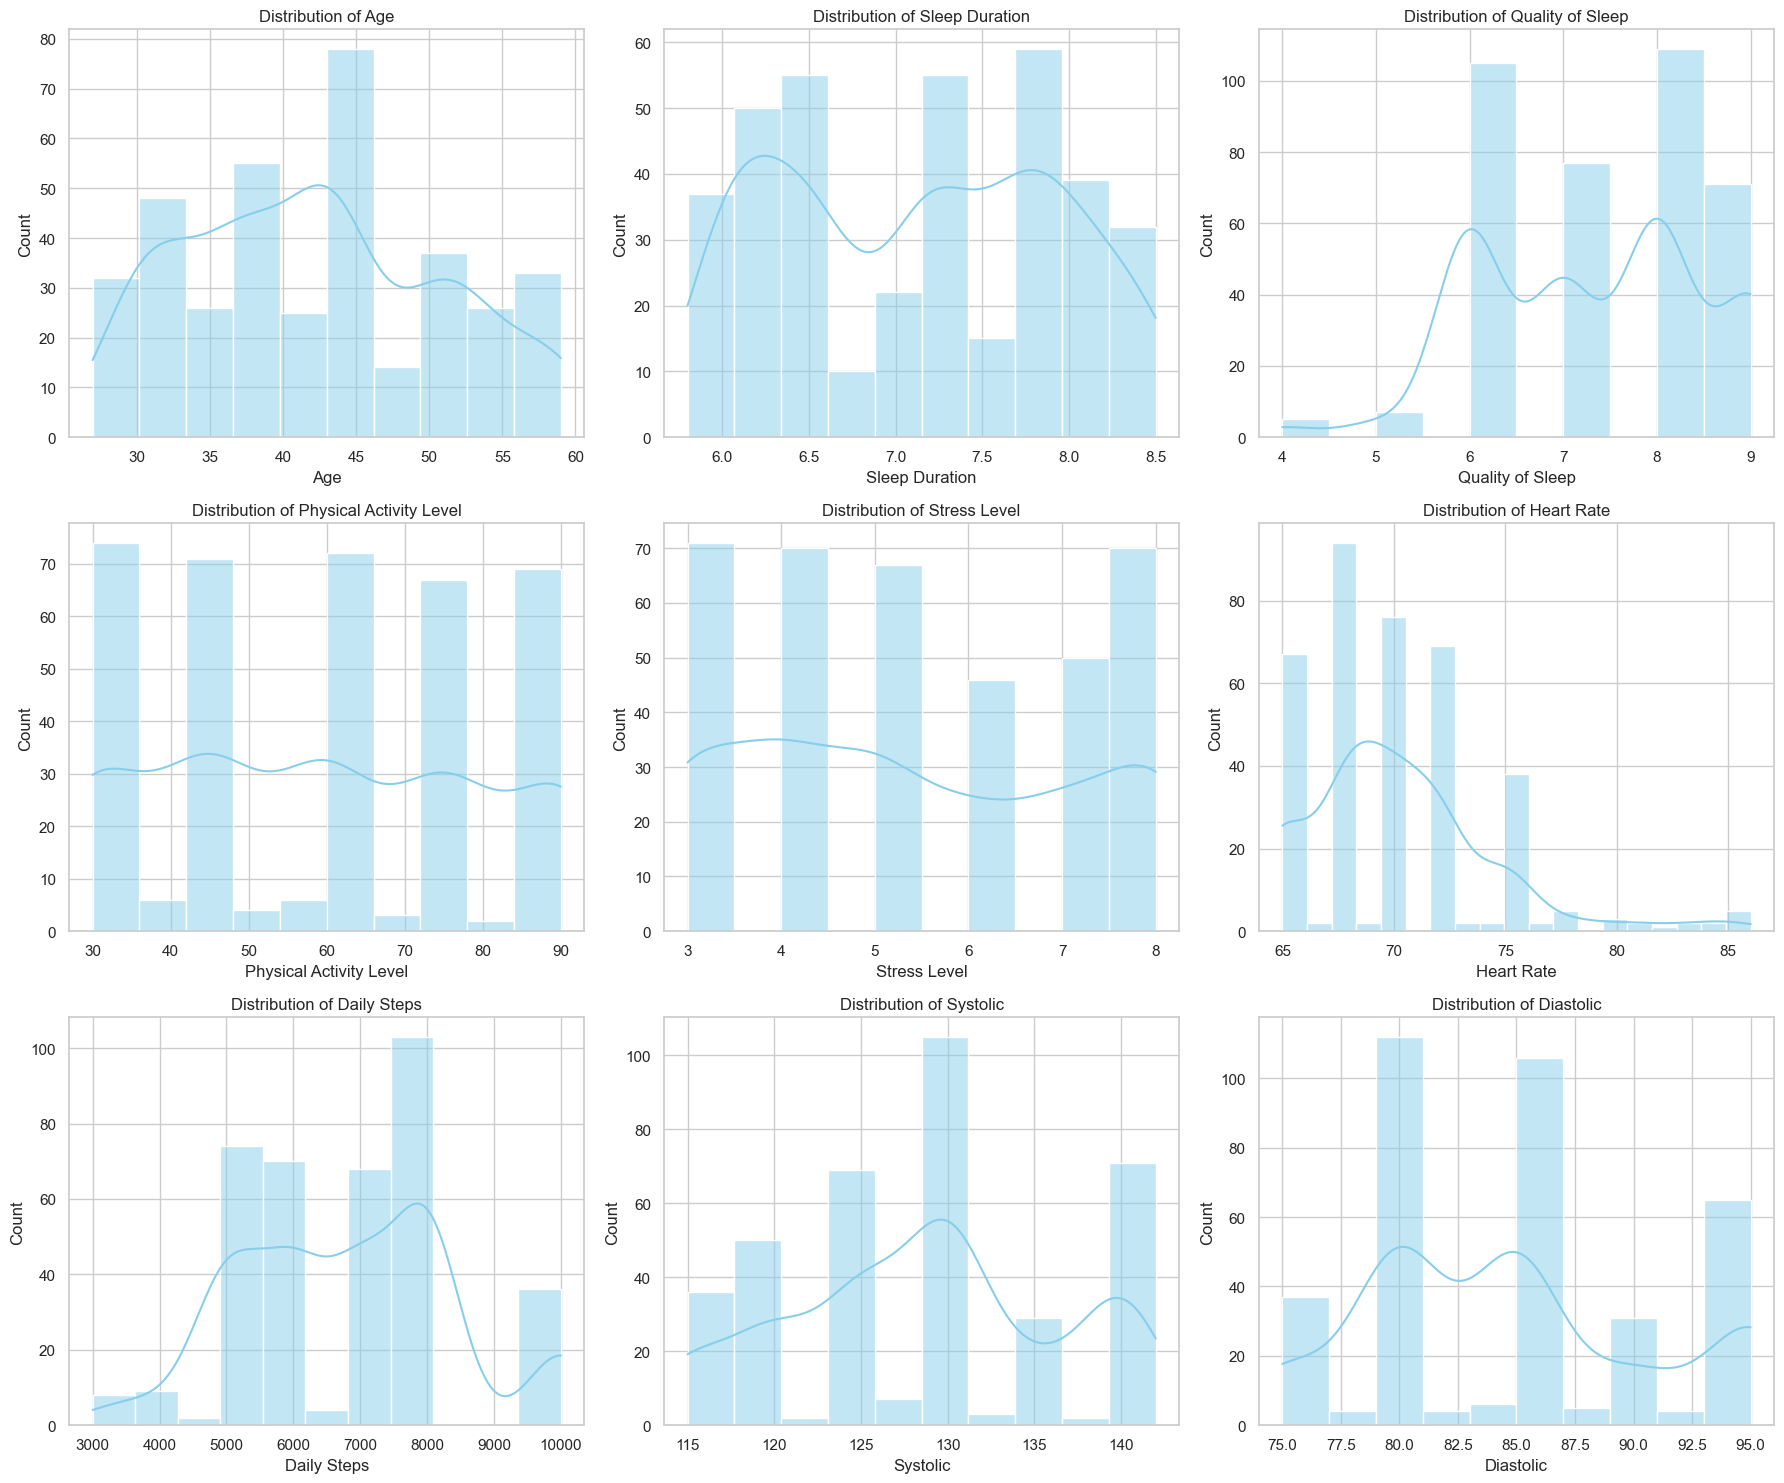

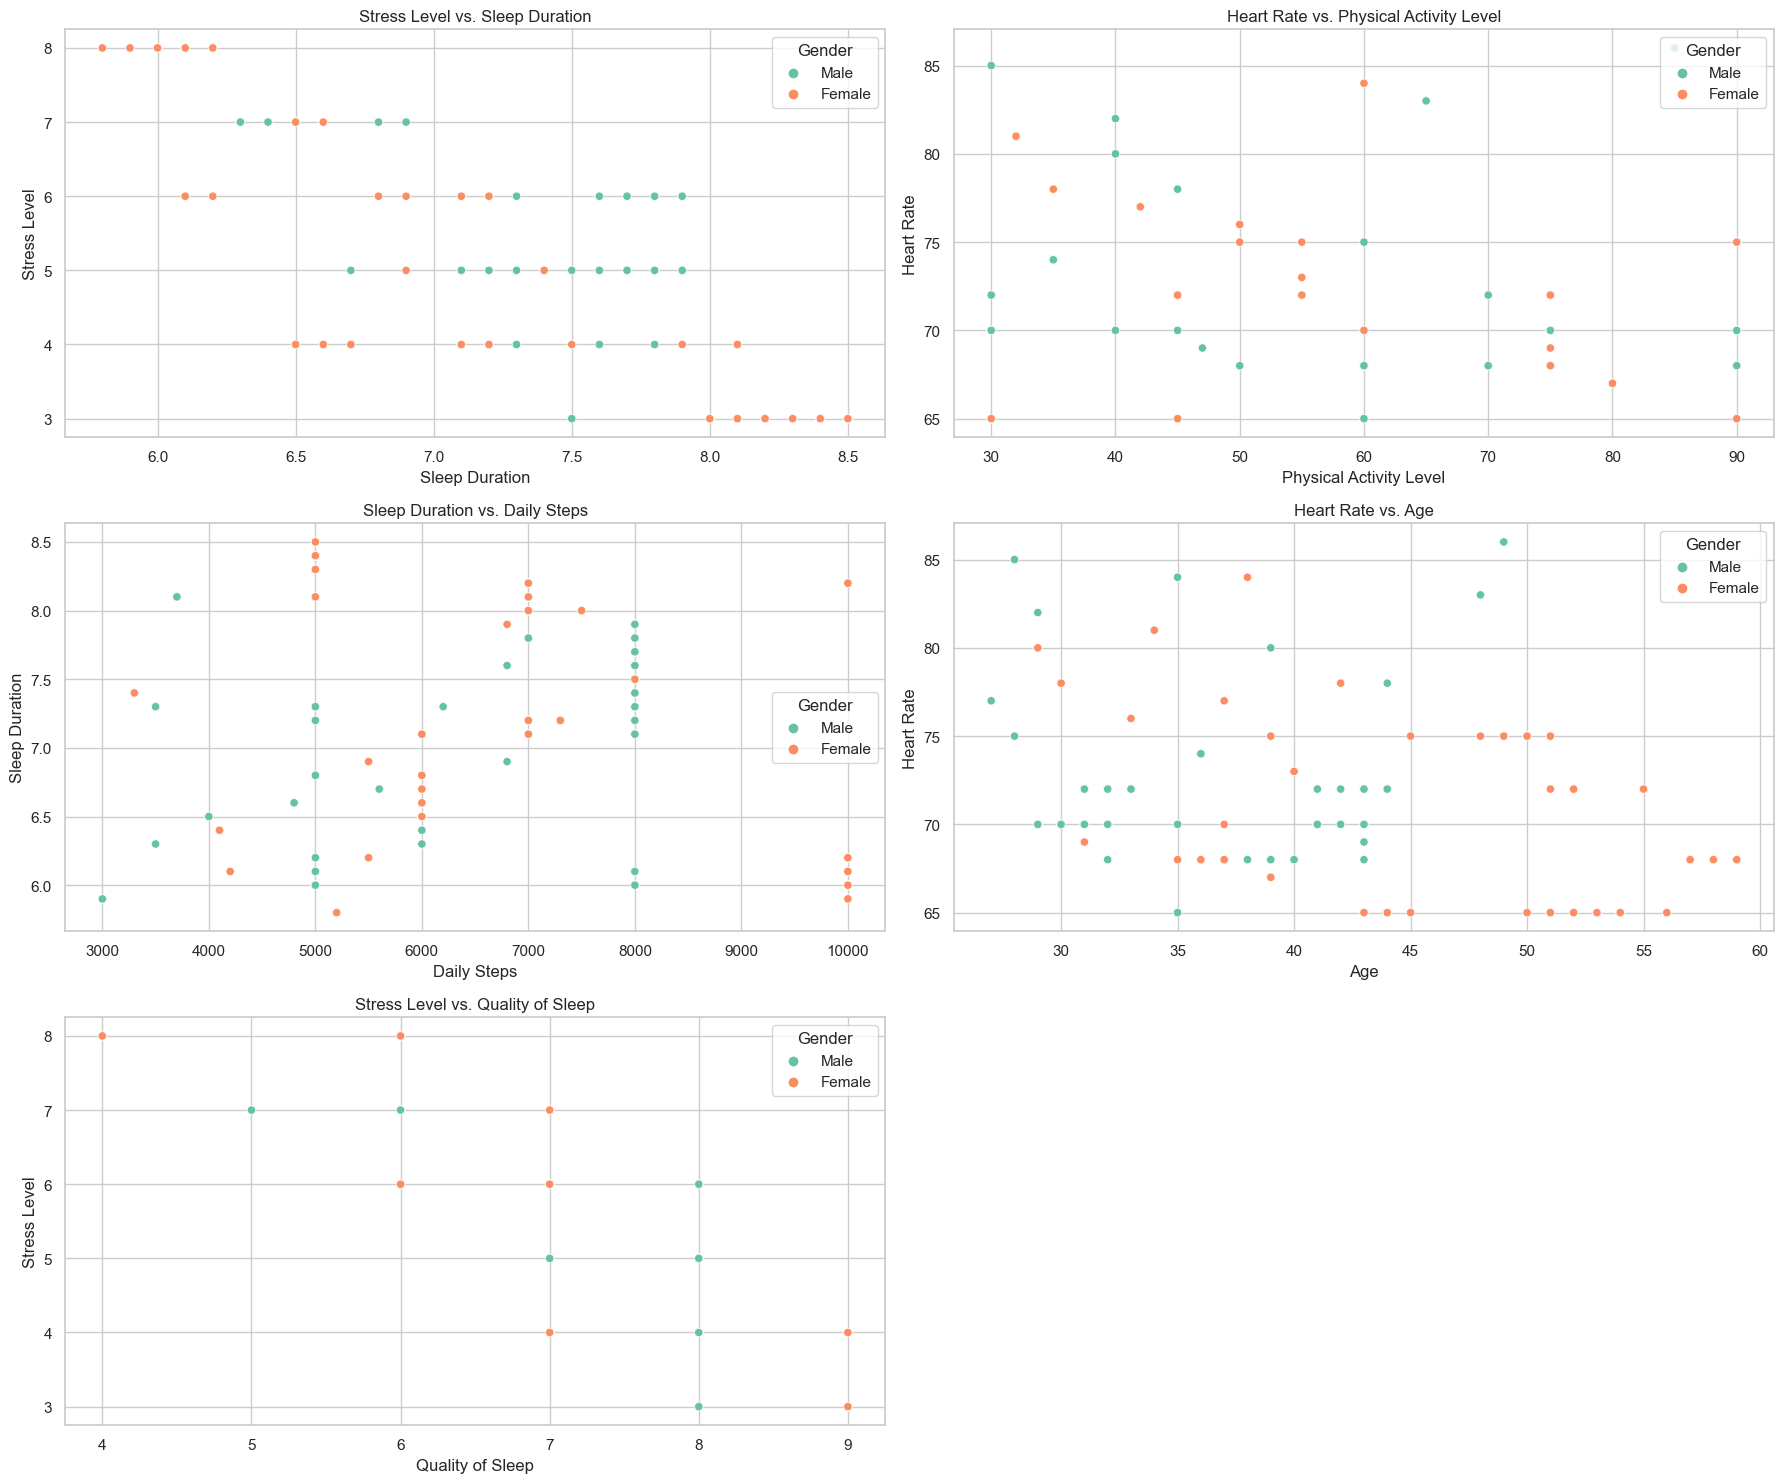

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("updated_data.csv")
# Check for missing values
print(df.isnull().sum())


# -----------------------------
# Dataset Info
# -----------------------------
print("----- Dataset Info -----")
df.info()

# -----------------------------
# Statistical Summary
# -----------------------------
print("\n----- Statistical Summary -----")
print(df.describe())

# -----------------------------
# Categorical Feature Summary
# -----------------------------
print("\n----- Categorical Value Counts -----")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

# -----------------------------
# Distribution of numerical features
# -----------------------------
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                      'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# -----------------------------
# Scatter plots between selected features
# -----------------------------
scatter_pairs = [
    ('Sleep Duration', 'Stress Level'),
    ('Physical Activity Level', 'Heart Rate'),
    ('Daily Steps', 'Sleep Duration'),
    ('Age', 'Heart Rate'),
    ('Quality of Sleep', 'Stress Level')
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

for i, (x, y) in enumerate(scatter_pairs):
    sns.scatterplot(data=df, x=x, y=y, hue='Gender', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{y} vs. {x}')

# Remove last empty subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


C:\Users\jayak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

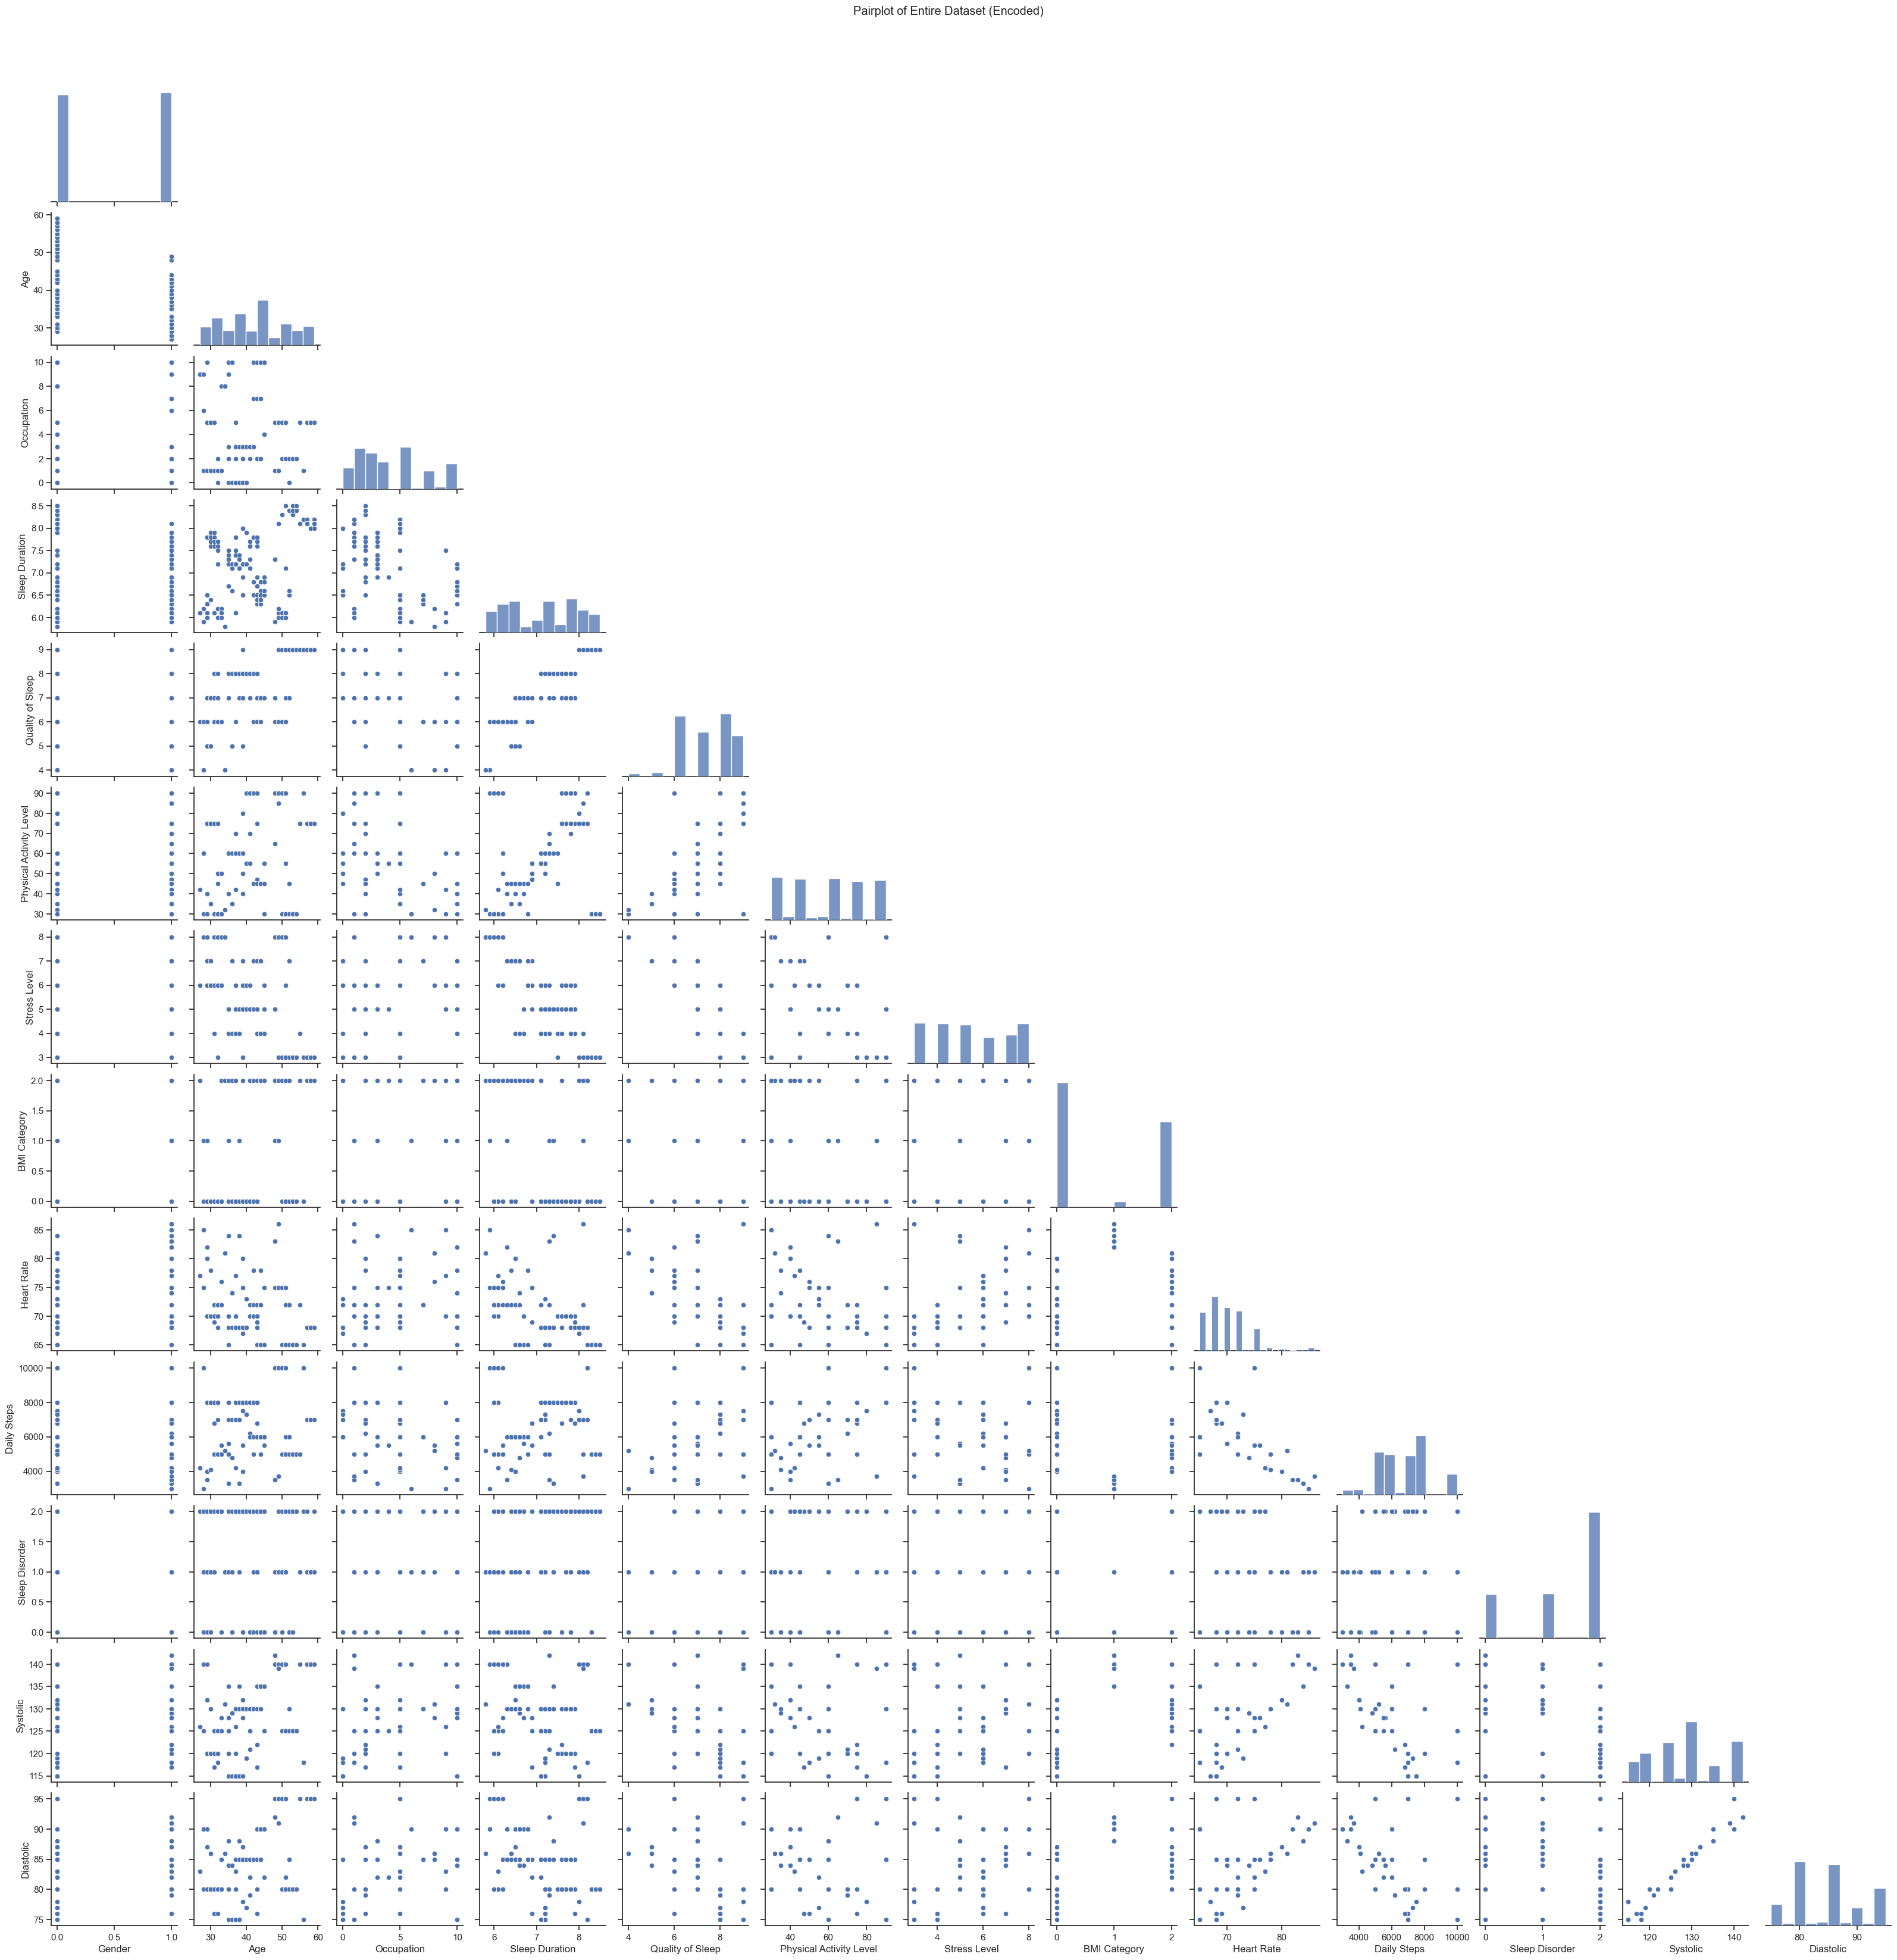

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("updated_data.csv")

# -----------------------------
# Encode all categorical features
# -----------------------------
df_encoded = df.copy()
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# -----------------------------
# Pairplot for the entire dataset
# -----------------------------
sns.set(style="ticks")
plt.figure(figsize=(20, 20))

# Optional: sample if the dataset is too big
# df_encoded = df_encoded.sample(200)

sns.pairplot(df_encoded, corner=True)
plt.suptitle("Pairplot of Entire Dataset (Encoded)", y=1.02)
plt.show()
